## Transfer Learning ResNet50 using Keras

In [1]:
# This model was created using google colab:
# To check your GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Apr 28 09:05:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Please download the dataset from the below url

In [2]:
# Tensorflow GPU
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Unzip the file
#!unzip /content/drive/MyDrive/Datasets.zip

unzip:  cannot find or open /content/drive/MyDrive/Datasets.zip, /content/drive/MyDrive/Datasets.zip.zip or /content/drive/MyDrive/Datasets.zip.ZIP.


In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [92]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [93]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton_Disease/train'
valid_path = '/content/drive/MyDrive/Cotton_Disease/test'


In [94]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

ResNet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [95]:
# don't train existing weights
for layer in ResNet50.layers:
    layer.trainable = False

In [96]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton_Disease/train/*')

In [97]:
# our layers - you can add more if you want
x = Flatten()(ResNet50.output)

In [98]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=ResNet50.input, outputs=prediction)

In [99]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [100]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [101]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [102]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [103]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [104]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
61/61 [==============================] - 39s 589ms/step - loss: 4.1625 - accuracy: 0.3438 - val_loss: 1.4827 - val_accuracy: 0.4717
Epoch 2/50
61/61 [==============================] - 34s 551ms/step - loss: 1.0730 - accuracy: 0.5322 - val_loss: 0.9747 - val_accuracy: 0.5377
Epoch 3/50
61/61 [==============================] - 34s 555ms/step - loss: 0.9340 - accuracy: 0.6135 - val_loss: 1.2236 - val_accuracy: 0.5000
Epoch 4/50
61/61 [==============================] - 34s 554ms/step - loss: 1.1401 - accuracy: 0.5642 - val_loss: 1.0999 - val_accuracy: 0.5094
Epoch 5/50
61/61 [==============================] - 34s 553ms/step - loss: 1.0410 - accuracy: 0.6123 - val_loss: 1.3688 - val_accuracy: 0.5755
Epoch 6/50
61/61 [==============================] - 34s 552ms/step - loss: 0.8837 - accuracy: 0.6790 - val_loss: 0.8597 - val_accuracy: 0.6321
Epoch 7/50
61/61 [==============================] - 34s 557ms/step - loss: 0.7262 - accuracy: 0.7176 - val_loss: 0.7194 - val_accuracy: 0.6698

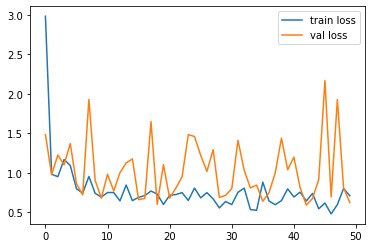

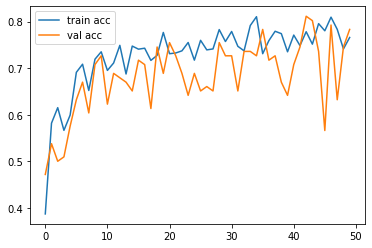

<Figure size 432x288 with 0 Axes>

In [105]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_cotton_ResNet50')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_cotton_ResNet50')

In [106]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cotton_ResNet50.h5')

In [107]:

y_pred = model.predict(test_set)


In [108]:
y_pred

array([[6.07247472e-01, 3.81209761e-01, 1.13566086e-04, 1.14292642e-02],
       [6.17573751e-05, 9.97101128e-01, 1.75201407e-04, 2.66186520e-03],
       [9.99999762e-01, 2.60027690e-07, 2.45458498e-09, 2.42182274e-09],
       [9.90596414e-01, 9.28470306e-03, 3.20053186e-05, 8.69009673e-05],
       [3.06031611e-02, 8.38644989e-03, 9.60472882e-01, 5.37482905e-04],
       [9.83909355e-04, 1.86025072e-02, 1.38562784e-01, 8.41850817e-01],
       [6.56399084e-03, 2.16121346e-01, 5.81820868e-02, 7.19132543e-01],
       [1.18146942e-03, 9.84932125e-01, 6.73548857e-06, 1.38796391e-02],
       [5.49046599e-05, 9.98289883e-01, 4.87523835e-07, 1.65476184e-03],
       [9.99994040e-01, 1.26508809e-07, 2.47013764e-11, 5.82151779e-06],
       [4.21297067e-04, 6.49190784e-01, 7.82618736e-05, 3.50309700e-01],
       [2.74699880e-04, 2.29462326e-04, 9.99443710e-01, 5.20828835e-05],
       [2.35885009e-02, 1.67803082e-04, 9.60400105e-01, 1.58436093e-02],
       [6.43221196e-04, 2.98539311e-01, 5.30488964e

In [109]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [110]:
y_pred

array([0, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 2, 2, 3, 3, 0, 3, 3, 1, 0, 1, 1,
       2, 1, 1, 3, 3, 3, 2, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2, 1, 1, 3, 2, 2,
       1, 1, 2, 3, 1, 0, 0, 3, 1, 2, 2, 1, 3, 2, 2, 3, 0, 3, 1, 3, 3, 3,
       1, 1, 1, 3, 2, 2, 0, 3, 1, 0, 1, 3, 1, 3, 3, 3, 1, 2, 1, 2, 3, 0,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 1, 3, 1])

In [111]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [112]:
model=load_model('model_cotton_ResNet50.h5')

In [113]:
img=image.load_img('/content/drive/MyDrive/Cotton_Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg',target_size=(224,224))

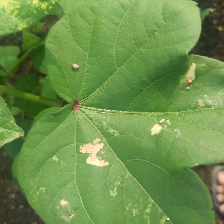

In [114]:
img

In [115]:
x=image.img_to_array(img)
x

array([[[223., 235., 133.],
        [229., 241., 139.],
        [225., 237., 135.],
        ...,
        [ 53.,  51.,  36.],
        [ 62.,  54.,  35.],
        [ 61.,  53.,  34.]],

       [[219., 231., 129.],
        [220., 232., 130.],
        [223., 235., 133.],
        ...,
        [ 51.,  49.,  34.],
        [ 60.,  52.,  33.],
        [ 63.,  55.,  36.]],

       [[223., 235., 133.],
        [220., 232., 130.],
        [228., 240., 138.],
        ...,
        [ 49.,  47.,  32.],
        [ 66.,  58.,  39.],
        [ 71.,  63.,  44.]],

       ...,

       [[ 56.,  50.,  36.],
        [ 56.,  50.,  36.],
        [ 56.,  50.,  36.],
        ...,
        [105.,  89.,  73.],
        [ 87.,  75.,  61.],
        [ 77.,  65.,  51.]],

       [[ 54.,  51.,  32.],
        [ 58.,  53.,  33.],
        [ 57.,  49.,  28.],
        ...,
        [128., 104.,  76.],
        [100.,  85.,  64.],
        [ 78.,  63.,  42.]],

       [[ 58.,  55.,  36.],
        [ 62.,  57.,  37.],
        [ 61.,  

In [116]:
x.shape

(224, 224, 3)

In [117]:
test_image = image.img_to_array(x)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [118]:
result

array([[0.19891492, 0.41390547, 0.00346806, 0.38371155]], dtype=float32)

In [119]:
model.predict(test_image)

array([[0.19891492, 0.41390547, 0.00346806, 0.38371155]], dtype=float32)

In [120]:
a=np.argmax(model.predict(test_image), axis=1)

In [121]:
a

array([1])

In [122]:
if a == 0:
    print("Diseased cotton leaf")
elif a == 1:
  print("Diseased cotton plant")
elif a == 2:
  print("Fresh cotton leaf")
else:
  print("Fresh cotton plant")

Diseased cotton plant
